# Bidding Strategy

In [1]:
# import library
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import data
pCTR = pd.read_csv('pCTRval.csv')
df_val = pd.read_csv('validation.csv')

## Mcpc

**bid = max_eCPC * pCTR**

In [3]:
# different strategy for each advetiser
adv = df_val.advertiser.unique()
table = pd.DataFrame(columns=['eCPC'])
ecpcs = []

# calculate ecpc
for i in range(len(adv)):
    ad = adv[i]
    df = df_val[df_val.advertiser == ad]
    clicks = df.click.sum()
    costs = df.payprice.sum()
    ecpcs.append(costs / clicks)
table['eCPC'] = ecpcs
maxECPC = table['eCPC'].max()

In [4]:
# function
# bid = maxEcpc * pCTR
def mecpc():
    bids = []
    for p in pCTR['0']:
        bid = maxECPC * p
        bids.append(bid)

    return bids

In [5]:
# new bid price
ecpcs = pd.DataFrame()
ecpcs['bids'] = mecpc()
df_val_temp = pd.concat([df_val, ecpcs],axis=1)
df_val_temp.head(5)

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,bids
0,0,5,14,91c6a6b9e90c0f54d3230815a5a3e22e,1,u_Vhk7C5STO8TZ3s8,windows_ie,14.122.240.*,216,232,...,0,1,0,449a22cd91d9042eda3d3a1b89a22ea8,227,102,0f951a030abdaedd733ee8d114ce2944,3427,"10006,10063,10059,10111",37.799027
1,0,3,14,24b3621ad3b063b6c09c541781d534b3,1,u_DANDbCAksMy,android_safari,116.22.55.*,216,217,...,FirstView,Na,118,11908,277,118,null,2997,null,1758.302668
2,0,1,13,6e7bce0a9ad42f479827d37bf9618a9d,1,u_VhkxPnKHPo1H3Vb,windows_ie,60.215.242.*,146,149,...,0,0,70,d01411218cc79bc49d2a4078c4093b76,241,77,b2e35064f3549d447edbbdfb1f707c8c,3427,null,198.347209
3,0,5,18,6873feca381b8293bf418ba8408a014c,1,u_Vh5zL3B83ln9Xbl,windows_chrome,27.193.87.*,146,148,...,0,0,70,c46090c887c257b61ab1fa11baee91d8,241,77,0f951a030abdaedd733ee8d114ce2944,3427,null,198.200852
4,0,5,14,7e6430333c552cf0b32bb21dc792d2df,1,u_VhKPOr5wOt9HQsj,windows_ie,183.228.214.*,275,275,...,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,178,361e128affece850342293213691a043,3386,null,107.780005


In [6]:
# evaluation
data_m = pd.DataFrame(columns=['clicks','imps','spent','CTR','CPC','CPM'])
lists = {'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}

budget = 6250000.0
imps = 0
clicks = 0
spent = 0
for i in range(0,len(df_val_temp)):
    payprice = df_val_temp.payprice[i]
    bid = df_val_temp.bids[i]
    if budget < payprice:
        break
    if bid >= payprice:
        imps = imps + 1
        clicks = clicks + df_val_temp.click[i]
        budget = budget - payprice
        spent = spent + payprice
spent = spent / 1000
ctr = ((clicks / imps) * 100).round(4).astype(str)
cpm = ((spent / imps) * 1000).round(4).astype(str)
cpc = (spent / clicks).round(4).astype(str)
lists['clicks'].append(clicks)
lists['imps'].append(imps)
lists['spent'].append(spent)
lists['ctr'].append(ctr)
lists['cpc'].append(cpc)
lists['cpm'].append(cpm)

data_m.clicks = lists['clicks']
data_m.imps = lists['imps']
data_m.spent = lists['spent']
data_m.CTR = lists['ctr']
data_m.CPC = lists['cpc']
data_m.CPM = lists['cpm']
data_m

,clicks,imps,spent,CTR,CPC,CPM
0,135,108818,6249.948,0.1241,46.2959,57.4349


In [51]:
bestm = pd.DataFrame(data_m)

## ORTB 

** bid = sqrt(c/λ * pCTR + c^2) - c**

In [15]:
# funtion
# bid = sqrt(c/lambda pctr + c^2) - c
def ortb():
    c = 6 #[1,21,1]
    lamda = 5e-7 #[1e−8,5e−8,1e−7,5e−7,1e−6,5e−6,1e−5,5e−5,1e−4,5e−4]
    bids = []
    for p in pCTR['0']:
        bid = np.sqrt((c/lamda * p) + c**2) - c 
        bids.append(bid)

    return bids

In [16]:
# new bid price
ortbs = pd.DataFrame()
ortbs['bids'] = ortb()
df_val_temp = pd.concat([df_val, ortbs],axis=1)
df_val_temp.head(5)

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,bids
0,0,5,14,91c6a6b9e90c0f54d3230815a5a3e22e,1,u_Vhk7C5STO8TZ3s8,windows_ie,14.122.240.*,216,232,...,0,1,0,449a22cd91d9042eda3d3a1b89a22ea8,227,102,0f951a030abdaedd733ee8d114ce2944,3427,"10006,10063,10059,10111",37.953129
1,0,3,14,24b3621ad3b063b6c09c541781d534b3,1,u_DANDbCAksMy,android_safari,116.22.55.*,216,217,...,FirstView,Na,118,11908,277,118,null,2997,null,291.029970
2,0,1,13,6e7bce0a9ad42f479827d37bf9618a9d,1,u_VhkxPnKHPo1H3Vb,windows_ie,60.215.242.*,146,149,...,0,0,70,d01411218cc79bc49d2a4078c4093b76,241,77,b2e35064f3549d447edbbdfb1f707c8c,3427,null,93.922258
3,0,5,18,6873feca381b8293bf418ba8408a014c,1,u_Vh5zL3B83ln9Xbl,windows_chrome,27.193.87.*,146,148,...,0,0,70,c46090c887c257b61ab1fa11baee91d8,241,77,0f951a030abdaedd733ee8d114ce2944,3427,null,93.885519
4,0,5,14,7e6430333c552cf0b32bb21dc792d2df,1,u_VhKPOr5wOt9HQsj,windows_ie,183.228.214.*,275,275,...,2,0,5,ff5123fb9333ca095034c62fdaaf51aa,300,178,361e128affece850342293213691a043,3386,null,67.769223


In [17]:
# evaluation
data_o = pd.DataFrame(columns=['clicks','imps','spent','CTR','CPC','CPM'])
lists = {'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}

budget = 6250000.0
imps = 0
clicks = 0
spent = 0
for i in range(0,len(df_val_temp)):
    payprice = df_val_temp.payprice[i]
    bid = df_val_temp.bids[i]
    if budget < payprice:
        break
    if bid >= payprice:
        imps = imps + 1
        clicks = clicks + df_val_temp.click[i]
        budget = budget - payprice
        spent = spent + payprice
spent = spent / 1000
ctr = ((clicks / imps) * 100).round(4).astype(str)
cpm = ((spent / imps) * 1000).round(4).astype(str)
cpc = (spent / clicks).round(4).astype(str)
lists['clicks'].append(clicks)
lists['imps'].append(imps)
lists['spent'].append(spent)
lists['ctr'].append(ctr)
lists['cpc'].append(cpc)
lists['cpm'].append(cpm)

data_o.clicks = lists['clicks']
data_o.imps = lists['imps']
data_o.spent = lists['spent']
data_o.CTR = lists['ctr']
data_o.CPC = lists['cpc']
data_o.CPM = lists['cpm']
data_o

,clicks,imps,spent,CTR,CPC,CPM
0,163,125495,5224.443,0.1299,32.0518,41.6307


In [49]:
besto = pd.DataFrame(data_o)

## Quadratic Strategy

**bid = base_bid * (pCTR / avgCTR)^2**

In [18]:
# Average CTR
avgCTR = df_val.click.sum() / df_val.bidid.count()
avgCTR

0.00075396415000550463

In [43]:
# function
#bid = base_bid * (pCTR / avgCTR)^2

def nonlinear():
    
    bid_max = 300

    bids = []
    l_pctrval = list(pCTR['0'])
    for base_bid in range(10, bid_max+10, 10):
        for p in l_pctrval:
            bid = base_bid * (p / avgCTR) **2
            bids.append(bid)

    bid_groups = [bids[x:x+len(pCTR)] for x in range(0, len(bids), len(pCTR))]
    return bid_groups

In [44]:
nonlinear()

[[0.43909316827083367,
  950.12929965597266,
  12.090593720528986,
  12.072757461591006,
  3.5700298106165151,
  23.761210274527947,
  6.3307309212071408,
  1.6130012751747667,
  0.21370046984156138,
  21.08191701012133,
  101.05927603696981,
  22.886965969145066,
  0.75455622797281419,
  21.742710635795781,
  0.82380754264475442,
  1.2191316162937804,
  17.931137393242459,
  1.2504283315366145,
  0.4421646525527167,
  0.53032987020929501,
  0.2644489120040745,
  0.36905960085392714,
  0.39805113077003851,
  4.2907033394362565e-06,
  0.77137853406541756,
  0.99120038935841814,
  2.3568958256712835,
  1.0641954097924431,
  0.075157781723907052,
  0.57955927928238871,
  1.6348373208933968,
  0.4270415639955002,
  0.4980149759630641,
  0.062179247731555476,
  52.487572058104782,
  0.45657171961991477,
  1.2232761833362085,
  0.18978230193562898,
  0.98090721603182707,
  0.35059435568623787,
  2.1239284628735899,
  2.7175561811709574,
  0.53383253022671129,
  0.86369377117443547,
  1.13861

In [45]:
# evaluation
data_q = pd.DataFrame(columns=['bid','clicks','imps','spent','CTR','CPC','CPM'])
lists = {'bid':[], 'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}
bid_groups = nonlinear()

maxi = 0
maxv = -1
for k in range(0,len(bid_groups)):
    budget = 6250000.0
    imps = 0
    clicks = 0
    spent = 0
    bid = bid_groups[k]
    check = bid >= df_val.payprice
    for i in range(0,len(check)):
        payprice = df_val.payprice[i]
        if budget < payprice:
            break
        if check[i]:
            imps = imps + 1
            clicks = clicks + df_val.click[i]
            budget = budget - payprice
            spent = spent + payprice
    spent = spent / 1000
    ctr = ((clicks / imps) * 100)
    cpm = ((spent / imps) * 1000)
    cpc = (spent / clicks)
    if ctr * clicks > maxv:
        maxv = ctr * clicks
        maxi = k
    lists['bid'] = range(10, 310, 10)
    lists['clicks'].append(clicks)
    lists['imps'].append(imps)
    lists['spent'].append(spent)
    lists['ctr'].append(ctr)
    lists['cpc'].append(cpc)
    lists['cpm'].append(cpm)

In [46]:
data_q.bid = lists['bid']
data_q.clicks = lists['clicks']
data_q.imps = lists['imps']
data_q.spent = lists['spent']
data_q.CTR = lists['ctr']
data_q.CPC = lists['cpc']
data_q.CPM = lists['cpm']
data_q.head(5)

,bid,clicks,imps,spent,CTR,CPC,CPM
0,10,116,22294,1398.491,0.520319,12.055957,62.729479
1,20,131,32330,2026.335,0.405196,15.468206,62.676616
2,30,141,40325,2538.147,0.349659,18.001043,62.942269
3,40,148,47131,2972.892,0.314018,20.087108,63.077210
4,50,151,53178,3362.467,0.283952,22.267993,63.230415


In [47]:
# Best nonlinear bid on click metric
data_q.iloc[np.where(data_q.clicks == data_q.clicks.max())[0]]

,bid,clicks,imps,spent,CTR,CPC,CPM
14,150,172,93160,6121.805,0.184629,35.59189,65.712806


In [48]:
bestq = pd.DataFrame(data_q.iloc[np.where(data_q.clicks == data_q.clicks.max())[0]])

## Exponential  Strategy

**bid = base_bid * exp(pCTR / avgCTR)**

In [41]:
# function
#bid = base_bid * exp(pCTR / avgCTR)

def exp():
    
    bid_max = 300

    bids = []
    l_pctrval = list(pCTR['0'])
    for base_bid in range(10, bid_max+10, 10):
        for p in l_pctrval:
            bid = base_bid * np.exp(p / avgCTR)
            bids.append(bid)

    bid_groups = [bids[x:x+len(pCTR)] for x in range(0, len(bids), len(pCTR))]
    return bid_groups

In [42]:
exp()

[[12.331174814354803,
  171106.71556633979,
  30.028815931888488,
  30.004461822410754,
  18.17564220779434,
  46.714390275864872,
  22.159005824891459,
  14.942462084820423,
  11.574102604848679,
  42.714840905080976,
  240.22290370123429,
  45.396225836541817,
  13.161250732132277,
  43.690297840320355,
  13.324514979151301,
  14.178769582854434,
  38.155009603103295,
  14.2420528103717,
  12.34019978502414,
  12.589636981262943,
  11.765881506253715,
  12.118028870569141,
  12.208070882815139,
  10.00655249187167,
  13.201389840873096,
  13.700309777132471,
  16.249527116652217,
  13.857203054567272,
  10.905624669152177,
  12.721906993184254,
  14.983001254924824,
  12.295519565618289,
  12.50023675411127,
  10.820461359380767,
  98.84981958681638,
  12.382206497891071,
  14.187180097246483,
  11.477017878838058,
  13.677873799347349,
  12.059186603253064,
  15.854384341586542,
  16.842188222500585,
  12.599199178669288,
  13.416318531948701,
  14.013473394008686,
  8155.6081474071

In [28]:
# evaluation
data_e = pd.DataFrame(columns=['bid','clicks','imps','spent','CTR','CPC','CPM'])
lists = {'bid':[], 'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}
bid_groups = exp()

maxi = 0
maxv = -1
for k in range(0,len(bid_groups)):
    budget = 6250000.0
    imps = 0
    clicks = 0
    spent = 0
    bid = bid_groups[k]
    check = bid >= df_val.payprice
    for i in range(0,len(check)):
        payprice = df_val.payprice[i]
        if budget < payprice:
            break
        if check[i]:
            imps = imps + 1
            clicks = clicks + df_val.click[i]
            budget = budget - payprice
            spent = spent + payprice
    spent = spent / 1000
    ctr = ((clicks / imps) * 100)
    cpm = ((spent / imps) * 1000)
    cpc = (spent / clicks)
    if ctr * clicks > maxv:
        maxv = ctr * clicks
        maxi = k
    lists['bid'] = range(10, 310, 10)
    lists['clicks'].append(clicks)
    lists['imps'].append(imps)
    lists['spent'].append(spent)
    lists['ctr'].append(ctr)
    lists['cpc'].append(cpc)
    lists['cpm'].append(cpm)

In [31]:
data_e.bid = lists['bid']
data_e.clicks = lists['clicks']
data_e.imps = lists['imps']
data_e.spent = lists['spent']
data_e.CTR = lists['ctr']
data_e.CPC = lists['cpc']
data_e.CPM = lists['cpm']
data_e.head(5)

,bid,clicks,imps,spent,CTR,CPC,CPM
0,10,133,49467,2207.652,0.268866,16.598887,44.628783
1,20,154,94318,3839.926,0.163277,24.934584,40.712547
2,30,171,124764,5466.523,0.137059,31.967971,43.814907
3,40,148,131123,6249.887,0.112871,42.228966,47.664308
4,50,121,121059,6249.726,0.099951,51.650628,51.625455


In [33]:
# Best nonlinear bid on click metric
data_e.iloc[np.where(data_e.clicks == data_e.clicks.max())[0]]

,bid,clicks,imps,spent,CTR,CPC,CPM
2,30,171,124764,5466.523,0.137059,31.967971,43.814907


In [52]:
beste = pd.DataFrame(data_e.iloc[np.where(data_e.clicks == data_e.clicks.max())[0]])

## Step strategy

**if (pctr / avgCTR) >= threshold， bid price = 300, else bid price = 0**

In [12]:
# evaluation
data_s = pd.DataFrame(columns=['threshold','clicks','imps','spent','CTR','CPC','CPM'])
lists = {'threshold':[],'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}

# threshold
threshold = np.linspace(0.8,0.9,10)
# avgCTR
avgCTR = df_val.click.sum() / df_val.bidid.count()

maxr = 0
maxv = -1
for ratio in threshold:
    budget = 6250000.0 #6250*1000
    imps = 0
    clicks = 0
    spent = 0    
    for i in range(0,len(pCTR)):
        r = pCTR['0'][i] / avgCTR
        if r >= ratio:
            bid = 300
            if budget < payprice:
                break
            if bid >= payprice:
                imps = imps + 1
                clicks = clicks + df_val_temp.click[i]
                budget = budget - payprice
                spent = spent + payprice
    spent = spent / 1000
    ctr = ((clicks / imps) * 100)
    cpm = ((spent / imps) * 1000)
    cpc = (spent / clicks)
    if clicks > maxv:
        maxr = ratio
        maxv = clicks
    lists['threshold'].append(ratio)
    lists['clicks'].append(clicks)
    lists['imps'].append(imps)
    lists['spent'].append(spent)
    lists['ctr'].append(ctr)
    lists['cpc'].append(cpc)
    lists['cpm'].append(cpm)

data_s.threshold = lists['threshold']
data_s.clicks = lists['clicks']
data_s.imps = lists['imps']
data_s.spent = lists['spent']
data_s.CTR = lists['ctr']
data_s.CPC = lists['cpc']
data_s.CPM = lists['cpm']
data_s = data_s.iloc[np.where(data_s.threshold == maxr)[0]]
data_s

,threshold,clicks,imps,spent,CTR,CPC,CPM
6,0.866667,108,39062,6249.92,0.276484,57.86963,160.0


In [53]:
bests = pd.DataFrame(data_s)

# Comparison of Bidding Strategies

In [57]:
#plotting histogram for comparison of each bidding strategries
#data taken from previous result

data = pd.DataFrame(columns=['strategy','clicks','impresion','total_spent','CTR','CPC','CPM'])
lists = {'name':[],'clicks':[], 'imps':[], 'spent':[], 'ctr':[], 'cpc':[], 'cpm':[]}

data = pd.concat([bestm, besto, bestq, beste, bests])
data['strategy'] = ['Mcpc','ORTB','Quadratic','Exponential', 'Step']
data = data.drop('threshold',axis=1)
data = data.drop('bid',axis=1)
data

,CPC,CPM,CTR,clicks,imps,spent,strategy
0,46.2959,57.4349,0.1241,135,108818,6249.948,Mcpc
0,32.0518,41.6307,0.1299,163,125495,5224.443,ORTB
14,35.5919,65.7128,0.184629,172,93160,6121.805,Quadratic
2,31.968,43.8149,0.137059,171,124764,5466.523,Exponential
6,57.8696,160,0.276484,108,39062,6249.920,Step


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

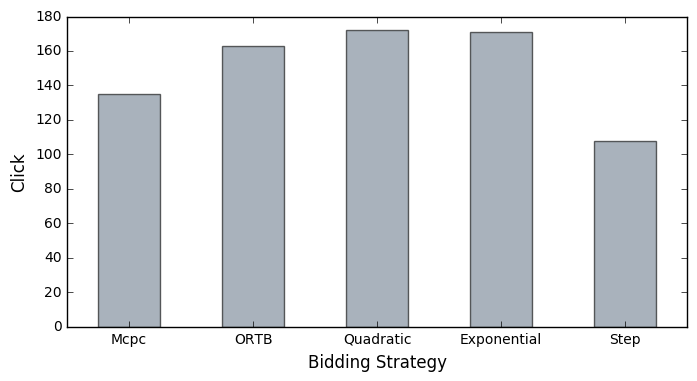

In [90]:
data.plot(kind='bar',alpha = 0.6, color='slategrey',y='clicks',x='strategy', figsize=(8, 4),legend=None) #,grid=True)
plt.ylabel("Click",fontsize=12)
plt.xlabel("Bidding Strategy",fontsize=12)
plt.xticks(rotation=0)
#h.set_rotation(0)

In [79]:
data['score'] = (2 * data['CTR'].apply(float) * data['clicks']) / (data['CPC'].apply(float) * data['CPM'].apply(float) * data['spent'].apply(float))
data

,CPC,CPM,CTR,clicks,imps,spent,strategy,score
0,46.2959,57.4349,0.1241,135,108818,6249.948,Mcpc,0.000002
0,32.0518,41.6307,0.1299,163,125495,5224.443,ORTB,0.000006
14,35.5919,65.7128,0.184629,172,93160,6121.805,Quadratic,0.000004
2,31.968,43.8149,0.137059,171,124764,5466.523,Exponential,0.000006
6,57.8696,160,0.276484,108,39062,6249.920,Step,0.000001
